In [1]:
# Basic ones
import pandas as pd
import numpy as np

# Scipy
import scipy

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import svm

import catboost as cat # --> poderosísimo CATBOOST!

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer

# Model summaries n shit
import statsmodels.api as sm

# Datetime
from datetime import datetime as dt

## Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_ames_housing.csv'
tb_housing = pd.read_csv(url)

In [6]:
def description (x):
    print(tb_housing[x].unique())
    print(tb_housing[x].dtype)
    print((tb_housing[x].isnull().sum())/(len(tb_housing[x])))
    print(tb_housing[x].hist())
    print(tb_housing[x].value_counts())
    

In [7]:
categorical_var_list= ['MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature','SaleType', 'SaleCondition']

In [ ]:
ex_cat_vars=['LotShape','Neighborhood','HouseStyle','Exterior1st',
             'Exterior2nd','MasVnrType','ExterQual','Foundation',
             'BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC',
             'KitchenQual','GarageType','GarageFinish']

In [11]:
ok_cat_vars=['MSZoning','LotConfig','Condition1','BldgType',
             'RoofStyle','ExterCond','SaleCondition']

In [13]:
bad_cat_vars=['Street','Alley','LandContour','Utilities','LandSlope',
              'Condition2','RoofMatl','BsmtCond','BsmtFinType2',
              'Heating','CentralAir','Electrical','Functional',
              'GarageQual','GarageCond','PavedDrive','PoolQC',
              'FireplaceQu','Fence','MiscFeature','SaleType']

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


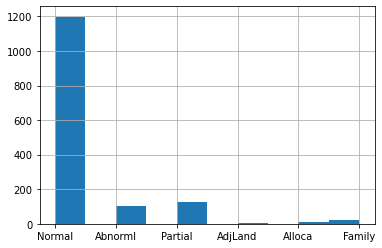

In [64]:
description('SaleCondition')

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


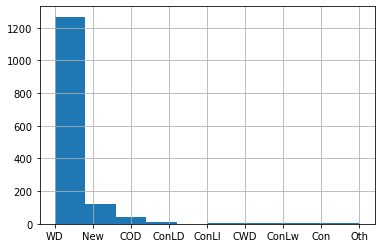

In [63]:
description('SaleType')

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
object
0.963013698630137
AxesSubplot(0.125,0.125;0.775x0.755)
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


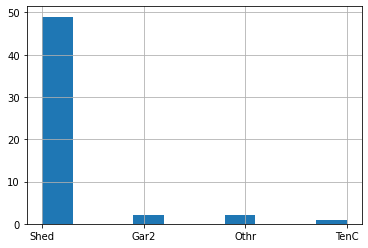

In [62]:
description('MiscFeature')

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
object
0.8075342465753425
AxesSubplot(0.125,0.125;0.775x0.755)
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


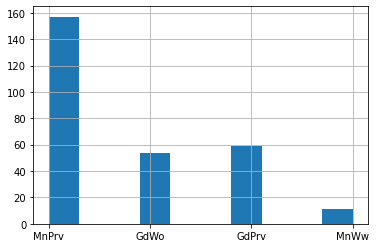

In [61]:
description('Fence')

[nan 'Ex' 'Fa' 'Gd']
object
0.9952054794520548
AxesSubplot(0.125,0.125;0.775x0.755)
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


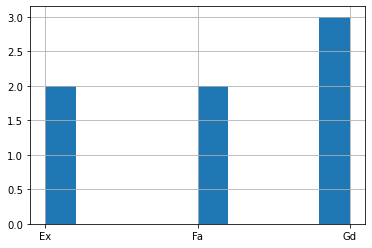

In [60]:
description('PoolQC')

['Y' 'N' 'P']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


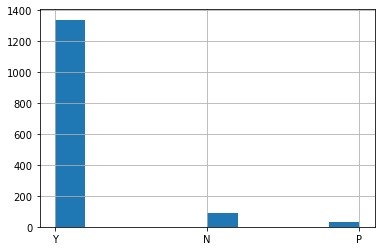

In [59]:
description('PavedDrive')

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
object
0.05547945205479452
AxesSubplot(0.125,0.125;0.775x0.755)
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


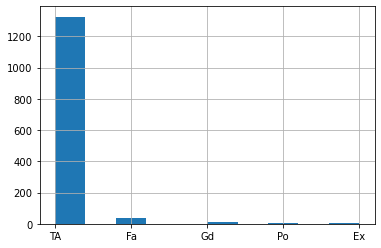

In [58]:
description('GarageCond')

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
object
0.05547945205479452
AxesSubplot(0.125,0.125;0.775x0.755)
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


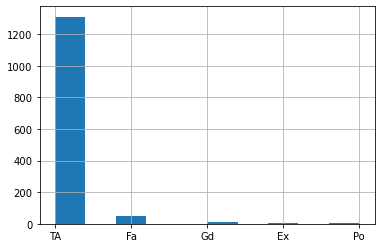

In [57]:
description('GarageQual')

['RFn' 'Unf' 'Fin' nan]
object
0.05547945205479452
AxesSubplot(0.125,0.125;0.775x0.755)
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


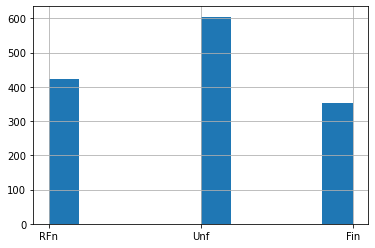

In [56]:
description('GarageFinish')

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
object
0.05547945205479452
AxesSubplot(0.125,0.125;0.775x0.755)
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


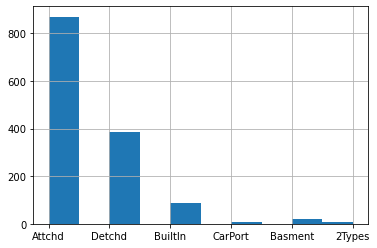

In [55]:
description('GarageType')

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
object
0.4726027397260274
AxesSubplot(0.125,0.125;0.775x0.755)
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


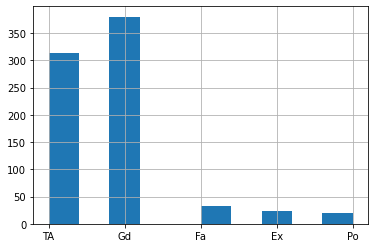

In [54]:
description('FireplaceQu')

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


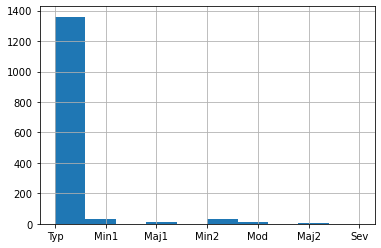

In [53]:
description('Functional')

['Gd' 'TA' 'Ex' 'Fa']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


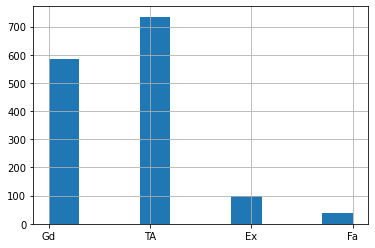

In [52]:
description('KitchenQual')

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
object
0.0006849315068493151
AxesSubplot(0.125,0.125;0.775x0.755)
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


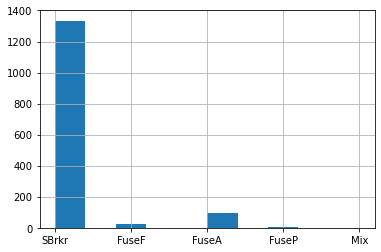

In [51]:
description('Electrical')

['Y' 'N']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Y    1365
N      95
Name: CentralAir, dtype: int64


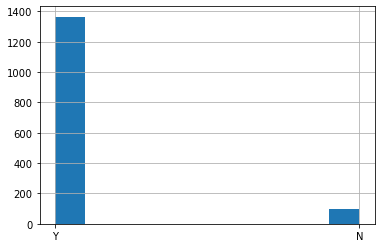

In [50]:
description('CentralAir')

['Ex' 'Gd' 'TA' 'Fa' 'Po']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


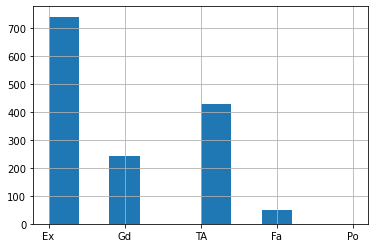

In [49]:
description('HeatingQC')

['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


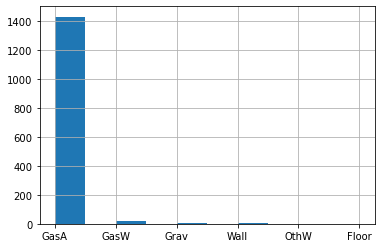

In [48]:
description('Heating')

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
object
0.026027397260273973
AxesSubplot(0.125,0.125;0.775x0.755)
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


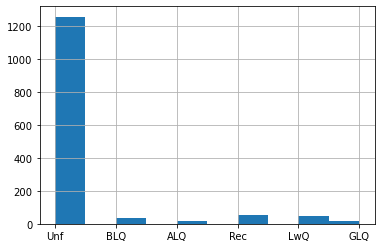

In [47]:
description('BsmtFinType2')

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
object
0.025342465753424658
AxesSubplot(0.125,0.125;0.775x0.755)
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


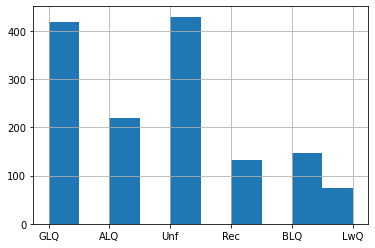

In [46]:
description('BsmtFinType1')

['No' 'Gd' 'Mn' 'Av' nan]
object
0.026027397260273973
AxesSubplot(0.125,0.125;0.775x0.755)
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


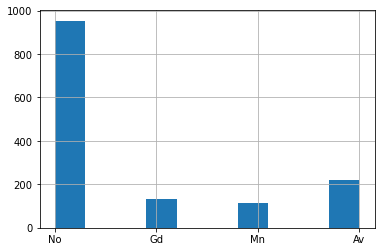

In [45]:
description('BsmtExposure')

['TA' 'Gd' nan 'Fa' 'Po']
object
0.025342465753424658
AxesSubplot(0.125,0.125;0.775x0.755)
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


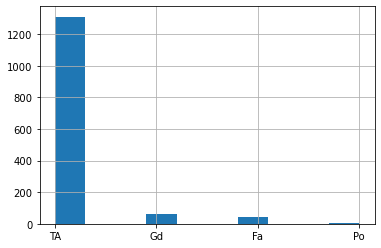

In [44]:
description('BsmtCond')

['Gd' 'TA' 'Ex' nan 'Fa']
object
0.025342465753424658
AxesSubplot(0.125,0.125;0.775x0.755)
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


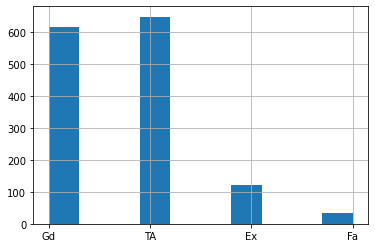

In [43]:
description('BsmtQual')

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


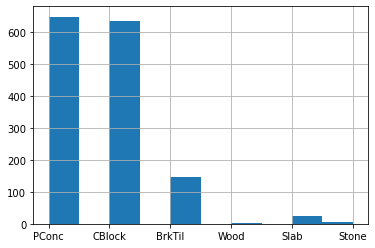

In [42]:
description('Foundation')

['TA' 'Gd' 'Fa' 'Po' 'Ex']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


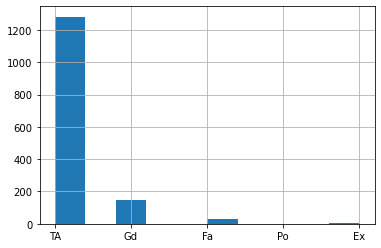

In [41]:
description('ExterCond')

['Gd' 'TA' 'Ex' 'Fa']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


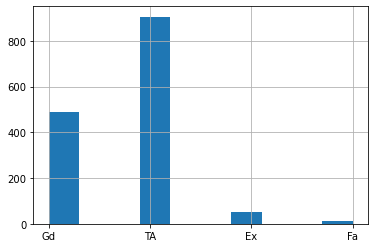

In [40]:
description('ExterQual')

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
object
0.005479452054794521
AxesSubplot(0.125,0.125;0.775x0.755)
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


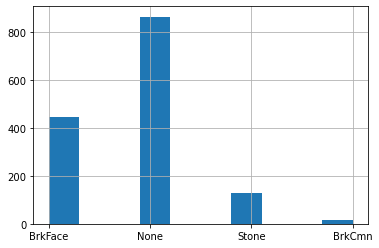

In [39]:
description('MasVnrType')

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


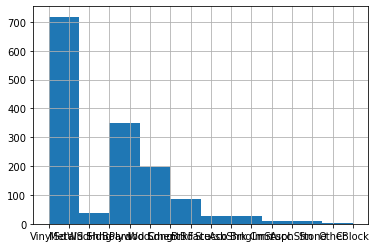

In [38]:
description('Exterior2nd')

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


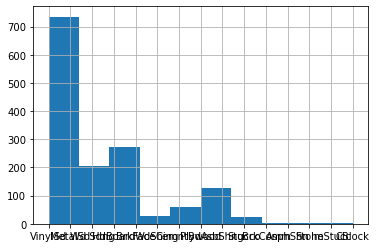

In [37]:
description('Exterior1st')

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


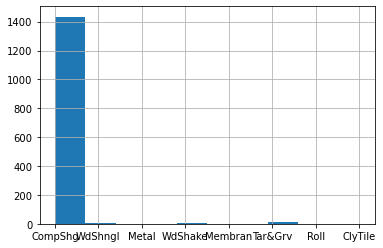

In [36]:
description('RoofMatl')

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


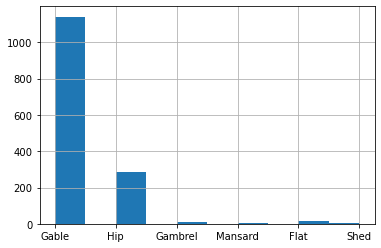

In [35]:
description('RoofStyle')

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


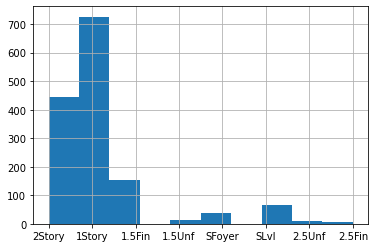

In [30]:
description('HouseStyle')

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


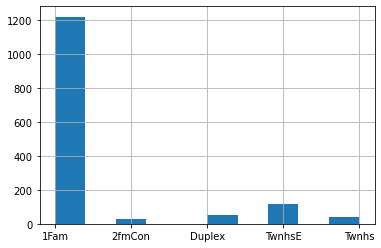

In [29]:
description('BldgType')

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


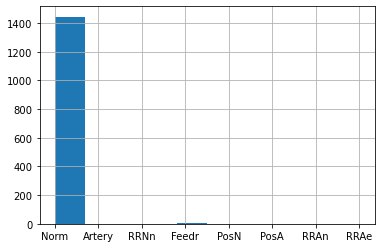

In [28]:
description('Condition2')

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


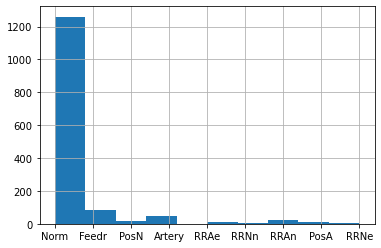

In [27]:
description('Condition1')

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


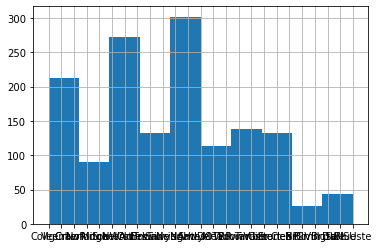

In [26]:
description('Neighborhood')

['Gtl' 'Mod' 'Sev']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


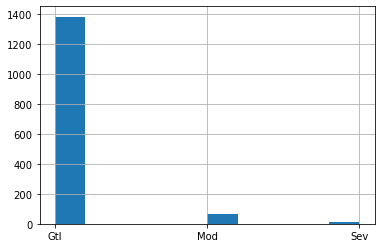

In [25]:
description('LandSlope')

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


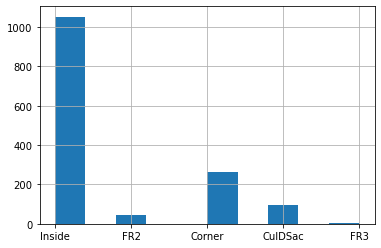

In [23]:
description('LotConfig')

['AllPub' 'NoSeWa']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


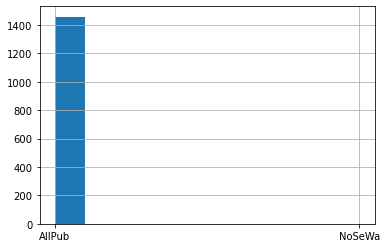

In [22]:
description('Utilities')

['Lvl' 'Bnk' 'Low' 'HLS']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


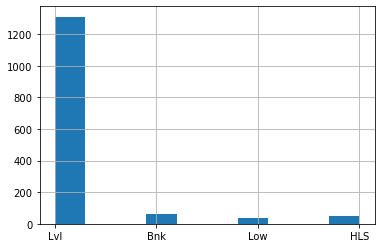

In [21]:
description('LandContour')

['Reg' 'IR1' 'IR2' 'IR3']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


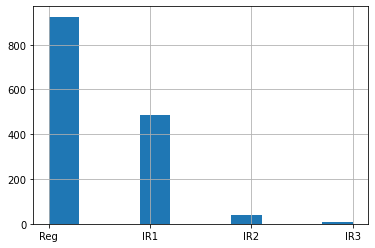

In [20]:
description('LotShape')

[nan 'Grvl' 'Pave']
object
0.9376712328767123
AxesSubplot(0.125,0.125;0.775x0.755)
Grvl    50
Pave    41
Name: Alley, dtype: int64


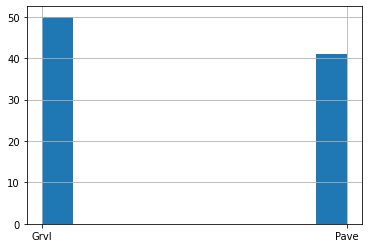

In [19]:
description('Alley')

['Pave' 'Grvl']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
Pave    1454
Grvl       6
Name: Street, dtype: int64


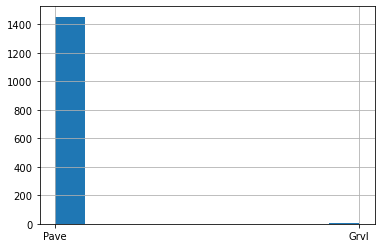

In [16]:
description('Street')

['RL' 'RM' 'C (all)' 'FV' 'RH']
object
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


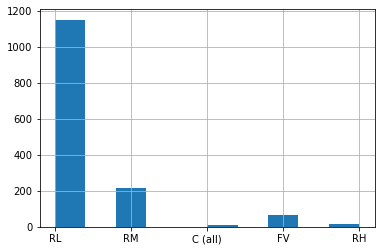

In [15]:
description('MSZoning')